# Text-Guided Editing of Images (Using CLIP and StyleGAN)

In [1]:
!git clone https://@github.com/orpatashnik/StyleCLIP.git

import os
os.chdir(f'./StyleCLIP')

!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

Cloning into 'StyleCLIP_encoder'...
remote: Enumerating objects: 283, done.
remote: Counting objects: 100% (283/283), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 283 (delta 60), reused 252 (delta 32), pack-reused 0
Receiving objects: 100% (283/283), 32.07 MiB | 46.84 MiB/s, done.
Resolving deltas: 100% (60/60), done.
     |████████████████████████████████| 71kB 6.4MB/s 
  Created wheel for ftfy: filename=ftfy-5.9-cp37-none-any.whl size=46451 sha256=e683f29e406a1cf82dd291064a285d9db2d4d54cddd11588b681fe38aa250203
  Stored in directory: /root/.cache/pip/wheels/5e/2e/f0/b07196e8c929114998f0316894a61c752b63bfa3fdd50d2fc3
Successfully built ftfy
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-0pncp513
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-0pncp513
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.8MB 239kB/s 
  Created wheel for clip: filename=clip-1.

In [2]:
from utils import ensure_checkpoint_exists
from mapper.scripts.inference import run

We provide several pretrained mappers. We also provide sample latent codes, of 6 celebs. 'n_images' allows to choose the number of latent codes (from the path provided in 'latent_path') that will be edited. If n_images is None then all the latent codes will be edited.

In [45]:
meta_data = {
  'afro': ['afro', False, False, True], 
  'angry': ['angry', False, False, True], 
  'Beyonce': ['beyonce', False, False, False], 
  'bobcut': ['bobcut', False, False, True], 
  'bowlcut': ['bowlcut', False, False, True], 
  'curly hair': ['curly_hair', False, False, True], 
  'Hilary Clinton': ['hilary_clinton', False, False, False],
  'Jhonny Depp': ['depp', False, False, False], 
  'mohawk': ['mohawk', False, False, True],
  'purple hair': ['purple_hair', False, False, False], 
  'surprised': ['surprised', False, False, True], 
  'Taylor Swift': ['taylor_swift', False, False, False],
  'trump': ['trump', False, False, False], 
  'Mark Zuckerberg': ['zuckerberg', False, False, False]    
}

edit_type = 'surprised' #@param ['afro', 'angry', 'Beyonce', 'bobcut', 'bowlcut', 'curly hair', 'Hilary Clinton', 'Jhonny Depp', 'mohawk', 'purple hair', 'surprised', 'Taylor Swift', 'trump', 'Mark Zuckerberg']
edit_id = meta_data[edit_type][0]
os.makedirs("mapper/pretrained", exist_ok=True)
ensure_checkpoint_exists(f"mapper/pretrained/{edit_id}.pt")
latent_path = "example_celebs.pt" #@param {type:"string"}
if latent_path == "example_celebs.pt":
  ensure_checkpoint_exists("example_celebs.pt")
n_images =  1#@param

args = {
    "exp_dir": "results/",
    "checkpoint_path": f"mapper/pretrained/{edit_id}.pt",
    "couple_outputs": True,
    "mapper_type": "LevelsMapper",
    "no_coarse_mapper": meta_data[edit_type][1],
    "no_medium_mapper": meta_data[edit_type][2],
    "no_fine_mapper": meta_data[edit_type][3],
    "stylegan_size": 1024,
    "test_batch_size": 1,
    "latents_test_path": latent_path,
    "test_workers": 1,
    "n_images": n_images
}


In [46]:
from argparse import Namespace
run(Namespace(**args))

  0%|          | 0/6 [00:00<?, ?it/s]

Loading from checkpoint: mapper/pretrained/surprised.pt


 17%|█▋        | 1/6 [00:00<00:02,  1.96it/s]

Runtime 0.2845+-0.0000


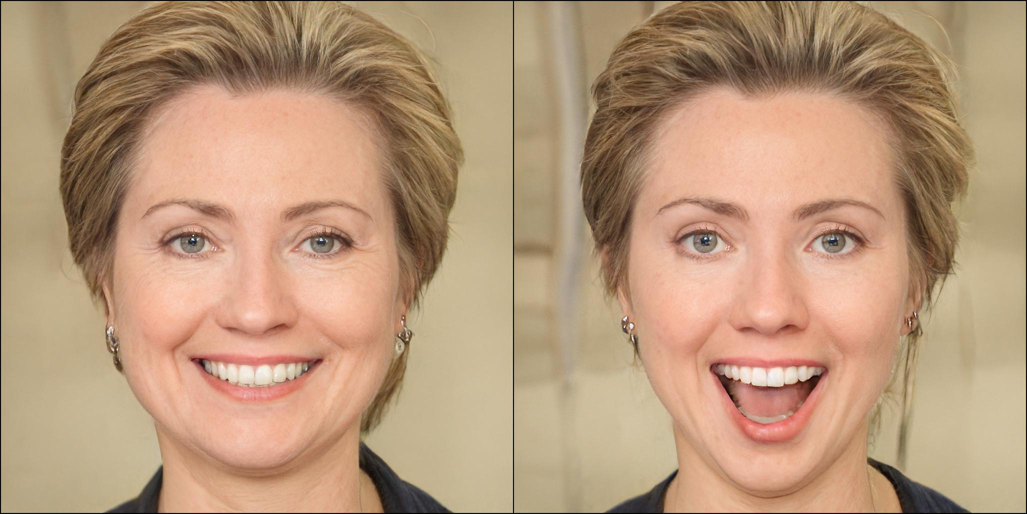

In [47]:
from PIL import Image
result = Image.open(f"results/inference_results/00000.jpg")
result = result.resize((int(result.width * 0.5), int(result.height * 0.5)))
grid = Image.new("RGB", (result.width, result.height * n_images))
grid.paste(result, (0, 0))
for i in range(1, n_images):
  result = Image.open(f"results/inference_results/{str(i).zfill(5)}.jpg")
  result = result.resize((int(result.width * 0.5), int(result.height * 0.5)))
  grid.paste(result, (0, int(result.height * i)))
grid